In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *

In [2]:
dataset = unpickle("record_n_discrete_data/wfm_n.pickle")

loading from record_n_discrete_data/wfm_n.pickle


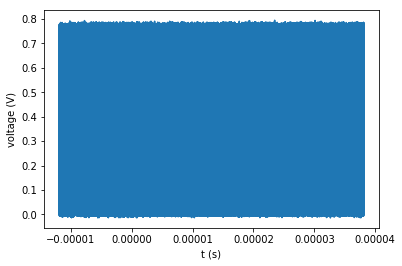

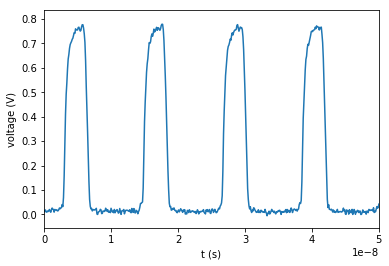

In [3]:
t = dataset[0]["t"]
wfm = dataset[0]["wfm"]

plt.plot(t,wfm)
plt.xlabel("t (s)")
plt.ylabel("voltage (V)")
plt.show()

plt.plot(t,wfm)
plt.xlabel("t (s)")
plt.ylabel("voltage (V)")
plt.xlim(0,50e-9)
plt.show()

In [4]:
threshold = 0.25

dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)

periods = np.array(re_times)-np.array(shift_vector(re_times,1))


In [5]:
periods

array([ -1.18941417e-05,   1.18273492e-08,   1.18460989e-08, ...,
         1.18381196e-08,   1.18413937e-08,   1.18337732e-08])

In [6]:
len(periods)

4223

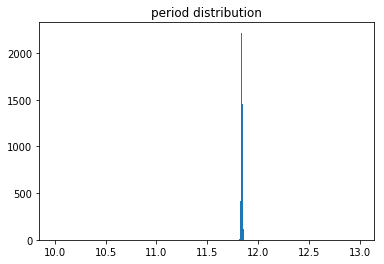

In [7]:
plt.hist(periods*1e9, bins = np.arange(10,13,0.01)) 
plt.title("period distribution") 
plt.show()

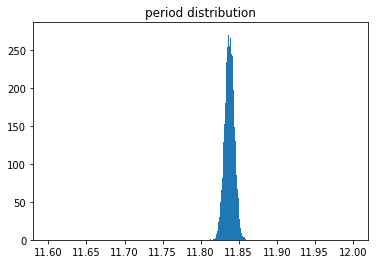

std_dev (ns)
0.00629001744371


In [8]:

plt.hist(periods*1e9, bins = np.arange(11.6,12.0,0.001)) 
plt.title("period distribution") 
plt.show()
print("std_dev (ns)")
print(np.std(1e9*periods[(periods>0)]))

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/000.png


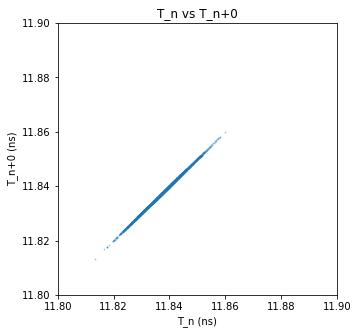

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/001.png


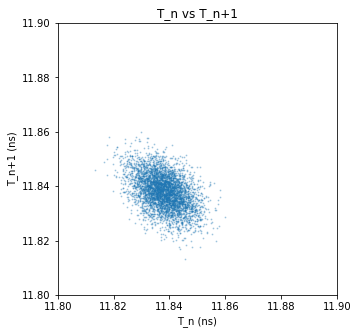

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/002.png


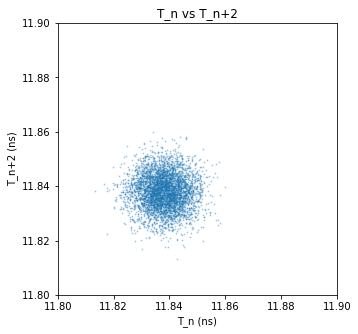

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/003.png


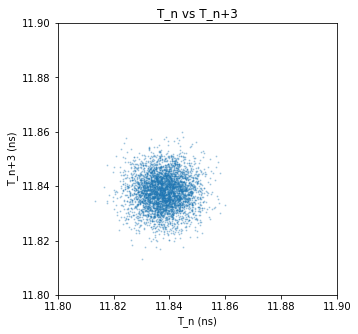

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/004.png


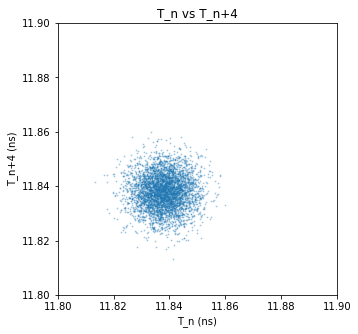

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/005.png


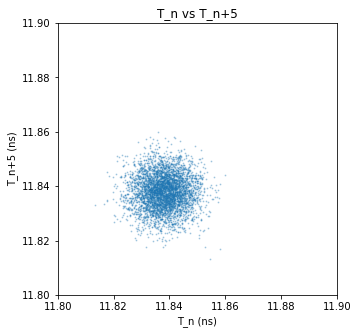

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/006.png


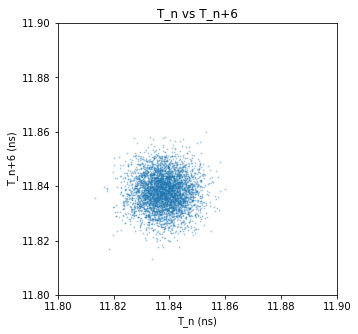

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/007.png


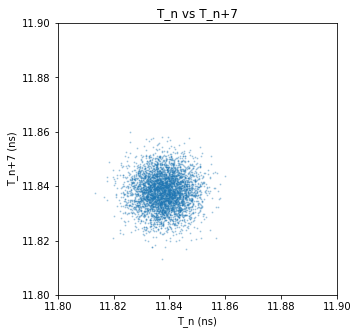

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/008.png


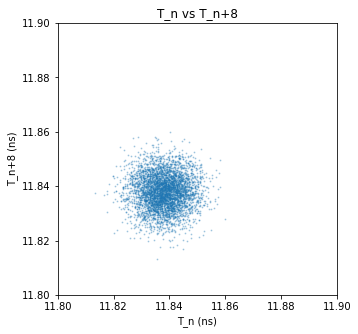

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_discrete_anim/009.png


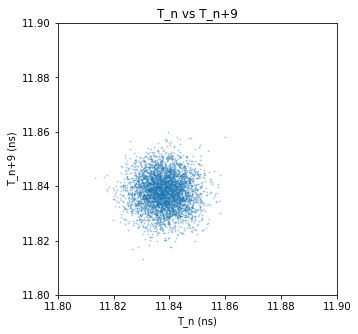

In [9]:

plt.rcParams["figure.figsize"] = (5,5)
    
for i in range(0,10,1):

  plt.scatter(periods*1e9,1e9*shift_vector(periods,-i),alpha=0.3,s=0.8)
  plt.xlim(11.8,11.9)
  plt.ylim(11.8,11.9)
  plt.title("T_n vs T_n+{:d}".format(i))
  plt.xlabel("T_n (ns)")
  plt.ylabel("T_n+{:d} (ns)".format(i))
  save_animation_frame(plt)
  plt.show()

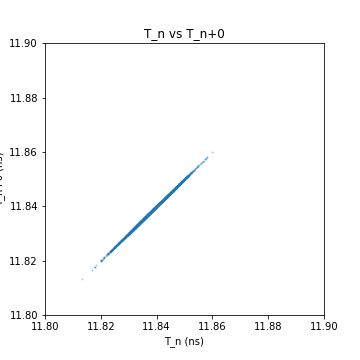

In [10]:
make_gif()

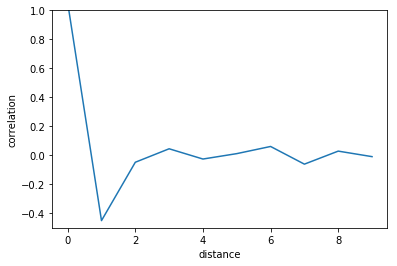

In [11]:
small_figure()

wfm = dataset[0]["wfm"]
t = dataset[0]["t"]

dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)

periods = np.array(re_times)-np.array(shift_vector(re_times,1))

#P = 1e9*periods[(periods>0)*(periods<20e-9) ]
P = 1e9*periods[(periods>0) ]

cov_list = []

std  = np.std(P)
mean = np.mean(P)
for i in range(0,10):
  cov = np.sum((P-mean)[0:1000]*(shift_vector(P-mean,-i)[0:1000]))/1000/(std*std)
  cov_list += [cov]
pearson = np.array(cov_list)

plt.plot(pearson)
plt.xlabel("distance")
plt.ylabel("correlation")
plt.ylim(-0.5,1)

plt.show()

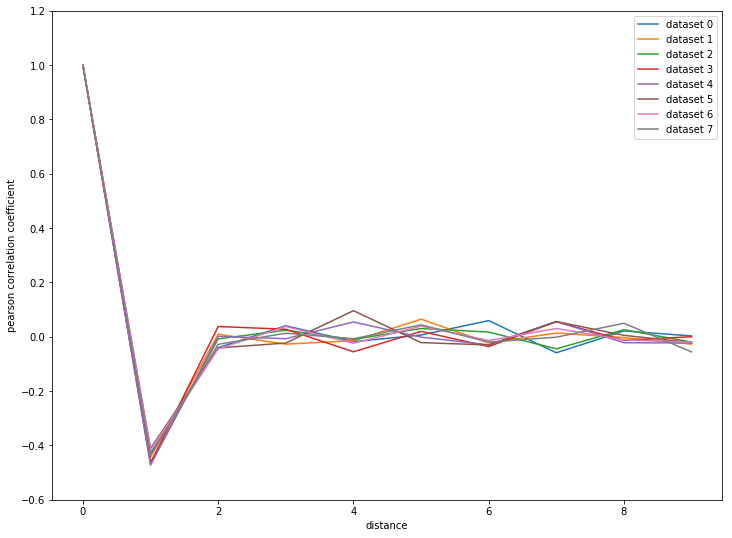

In [12]:
big_figure()

from statistics_kit import *

for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)
  
  periods = np.array(re_times)-np.array(shift_vector(re_times,1))
  
  P = 1e9*periods[(periods>0e-9) * (periods < 20e-9)]
  
  #ov_list = []
  #
  #std  = np.std(P)
  #mean = np.mean(P)
  #for i in range(0,10):
  #  cov = np.sum((P-mean)[0:1000]*(shift_vector(P-mean,-i)[0:1000]))/1000/(std*std)
  #  cov_list += [cov]
  #pearson = np.array(cov_list)
    
  pearson_list = []
  for i in range(0,10):
    X = P[10:1000]
    Y = shift_vector(P,-i)[10:1000]
    pearson_list += [pearson(X,Y)]
  
  plt.plot(pearson_list,label="dataset {:d}".format(j))
plt.xlabel("distance")
plt.ylabel("pearson correlation coefficient")
plt.legend()
plt.ylim(-0.6,1.2)

plt.show()

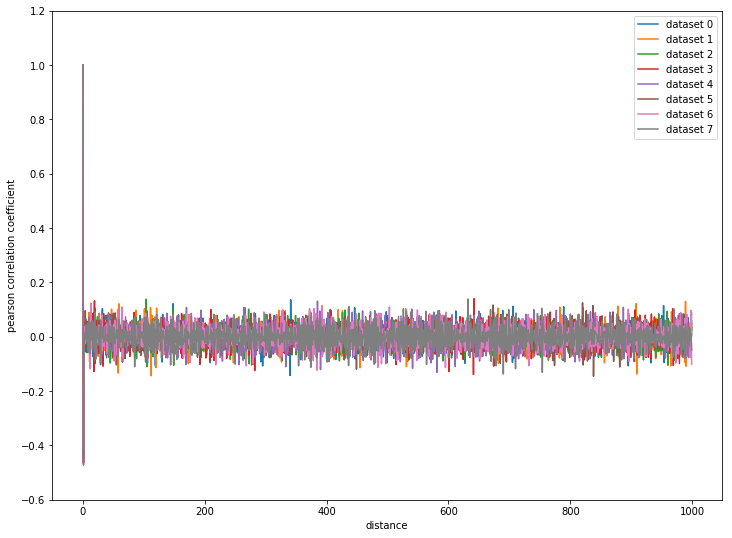

In [13]:
big_figure()

from statistics_kit import *

for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)
  
  periods = np.array(re_times)-np.array(shift_vector(re_times,1))
  
  P = 1e9*periods[(periods>0e-9) * (periods < 20e-9)]
  
  #ov_list = []
  #
  #std  = np.std(P)
  #mean = np.mean(P)
  #for i in range(0,10):
  #  cov = np.sum((P-mean)[0:1000]*(shift_vector(P-mean,-i)[0:1000]))/1000/(std*std)
  #  cov_list += [cov]
  #pearson = np.array(cov_list)
    
  pearson_list = []
  for i in range(0,1000):
    X = P[10:1000]
    Y = shift_vector(P,-i)[10:1000]
    pearson_list += [pearson(X,Y)]
  
  plt.plot(pearson_list,label="dataset {:d}".format(j))
plt.xlabel("distance")
plt.ylabel("pearson correlation coefficient")
plt.legend()
plt.ylim(-0.6,1.2)

plt.show()

11.8380024716
11.8377642876
11.8377642613
11.837741151
11.8372431661
11.8382571105
11.8377362465
11.8383005216


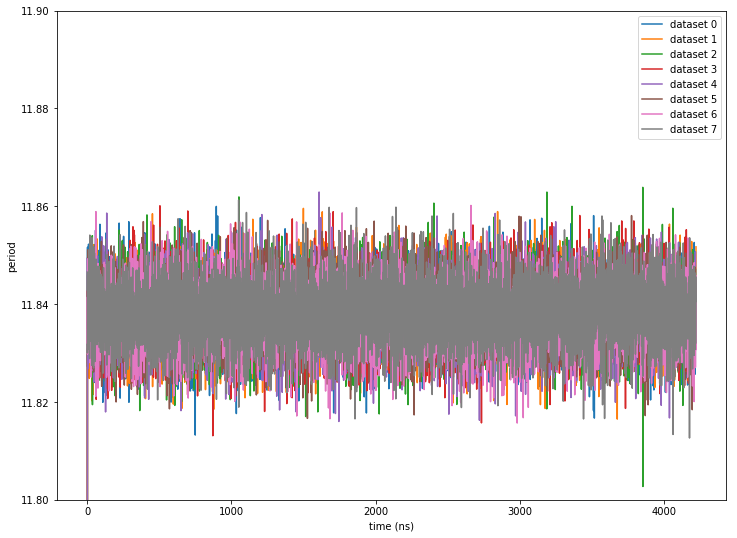

In [14]:
big_figure()



for j in range(0,len(dataset)):
#for j in range(0,1):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)
  
  periods = np.array(re_times)-np.array(shift_vector(re_times,1))
  
  P = 1e9*periods[periods>0]
  print(np.mean(P))
  
  
  plt.plot(P,label="dataset {:d}".format(j))
#plt.xlabel("distance")
plt.xlabel("time (ns)")
plt.ylabel("period")
plt.legend()
plt.ylim(11.8,11.9)

plt.show()

/usr/lib/python3/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


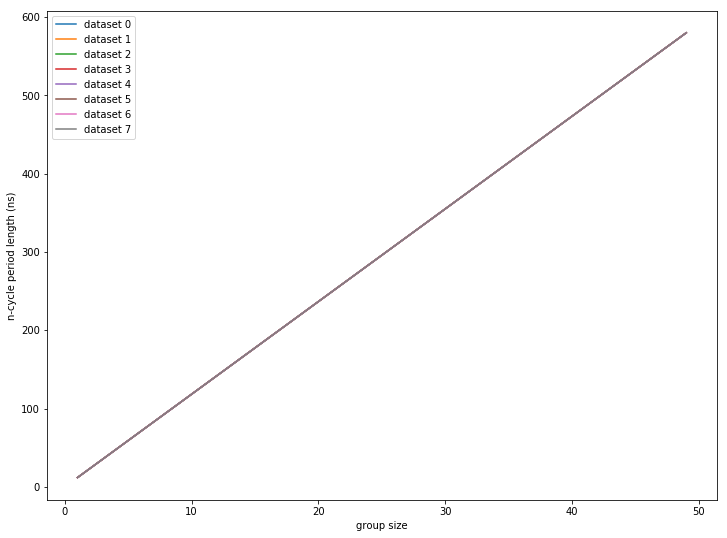

In [15]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)
  
    
  mean_list = []
  std_list  = []
    
  for i in range(0,50):
    periods = np.array(re_times)-np.array(shift_vector(re_times,i))
    
    P = 1e9*periods[(periods>0)]
    
    
    std  = np.std(P)
    mean = np.mean(P)
    mean_list += [mean]
    std_list  += [std]
    
  means = np.array(mean_list)
  stds  = np.array(std_list)
  
  plt.plot(means,label="dataset {:d}".format(j))
    
plt.xlabel("group size")
plt.ylabel("n-cycle period length (ns)")
plt.legend()

plt.show()

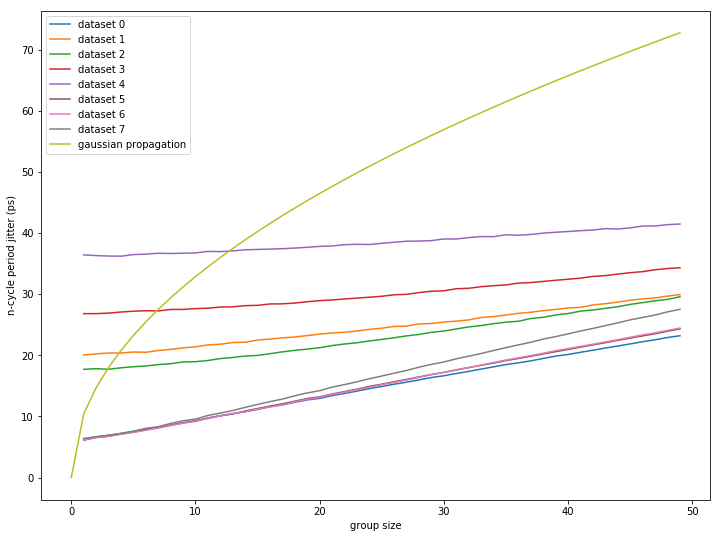

In [16]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)
  
    
  mean_list = []
  std_list  = []
    
  myrange = np.array(range(0,50))
    
  for i in myrange:
    periods = np.array(re_times)-np.array(shift_vector(re_times,i))
    
    P = 1e9*periods[(periods>0)]
    
    
    std  = np.std(P)
    mean = np.mean(P)
    mean_list += [mean]
    std_list  += [std]
    
  means = np.array(mean_list)
  stds  = np.array(std_list)
  
  plt.plot(stds*1e3,label="dataset {:d}".format(j))
    

plt.plot(myrange , 10.4*np.sqrt(myrange)  , label="gaussian propagation" )
#plt.plot(myrange , 10.4*myrange  , label="linear propagation" )
plt.xlabel("group size")
plt.ylabel("n-cycle period jitter (ps)")
plt.legend()

plt.show()

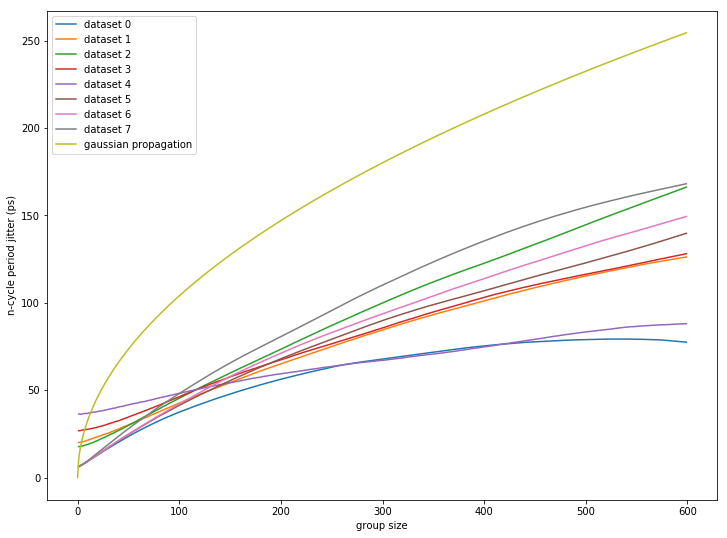

In [17]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate(t,wfm,threshold,multi_hit=1)
  
    
  mean_list = []
  std_list  = []
    
  myrange = np.array(range(0,600))
    
  for i in myrange:
    periods = np.array(re_times)-np.array(shift_vector(re_times,i))
    
    P = 1e9*periods[(periods>0)]
    
    
    std  = np.std(P)
    mean = np.mean(P)
    mean_list += [mean]
    std_list  += [std]
    
  means = np.array(mean_list)
  stds  = np.array(std_list)
  
  plt.plot(stds*1e3,label="dataset {:d}".format(j))
    

plt.plot(myrange , 10.4*np.sqrt(myrange)  , label="gaussian propagation" )
#plt.plot(myrange , 10.4*myrange  , label="linear propagation" )
plt.xlabel("group size")
plt.ylabel("n-cycle period jitter (ps)")
plt.legend()

plt.show()